# Mammal Type Classifier

The purpose of this notebook is to create a mammal type classifier using a pretrained neural network, capable of identifying and categorizing various mammals into five primary groups: primates, rodents, ungulates, carnivores, and marsupials.

To achieve this, we first collect and preprocess approximately 50 images per animal from each mammal category by automating image retrieval from Duckduckgo. Using requests, we scrape image URLs from search results and download them for training. The script constructs search queries, extracts relevant image links, and saves them in structured datasets.

Next, we fine-tune the pretrained neural network to recognize these mammal groups. Finally, we evaluate the model’s performance by testing it on new images, assessing its accuracy and generalization capabilities.


### Steps:
#### 1. Get and Preprocess data
   Use Google and Bing to search for images of various mammal types, extracting image URLs with BeautifulSoup and downloading them for training. Approximately 50 images per animal are collected to ensure dataset diversity
   - Carnivores: Bears, leopards, lions, tigers, and wolves
   - Marsupials: Kangaroos, koalas, opossums, wallabies, and wombats
   - Primates: Baboons, capuchin monkeys, chimpanzees, gorillas, and orangutans
   - Rodents: Beavers, mice, rabbits, rats, and squirrels
   - Ungulates: Deer, elk, giraffes, moose, and zebras
   
#### 2. Train the Model
   Fine-tune a pretrained neural network to recognise these groups

#### 3. Test the Model 
   Test the model on images

## Step 1: Get and Preprocess data

In [4]:
# import libraries
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
# from duckduckgo_search import ddg_imagesddg
from tkinter import Image
from time import sleep
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML
import os
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt
from duckduckgo_search import DDGS
from pathlib import Path

import os
from collections import defaultdict
import pandas as pd
from pathlib import Path

In [2]:
# duckduckgo search function
def search_duckduckgo_image(query, max_images=1):
    """search for image URLs using DuckDuckGo."""
    with DDGS() as ddgs:
        results = list(ddgs.images(f'{query} mammal photo', max_results=max_images))
    return [img['image'] for img in results] if results else None

def process_image(query, mammal, max_images=1, test=True):
    """process the image search, download, resize, and display/save."""
    urls = search_duckduckgo_image(query, max_images)
    if not urls:
        print("No images found.")
        return

    for i, url in enumerate(urls):
        # download image from url
        headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
            }

        try:
            response = requests.get(url, headers=headers, timeout=5)
            response.raise_for_status()  # ensure we got a valid response
            image = Image.open(BytesIO(response.content))
            image.verify()  # check if the image is valid
            image = Image.open(BytesIO(response.content))  # reopen after verification
        except (requests.exceptions.RequestException, UnidentifiedImageError) as e:
            print(f"Skipping invalid image: {e}")
            continue
    
        # resize image
        resized_image = image.resize((259, 259))

        if test:
            # display image
            print(f'{mammal} - {query}')
            display(resized_image)

            # saving image in sample folder
            resized_image.convert("RGB").save(os.path.join(f'images/sample/{mammal}', f'{query}_{i}.jpg'))


        else:
            # saving image in sample folder
            resized_image.convert("RGB").save(os.path.join(f'images/training/{mammal}', f'{query}_{i}.jpg'))
            print(f"Searching for {mammal} {query} image {i+1} of {max_images}.")

carnivores - bear


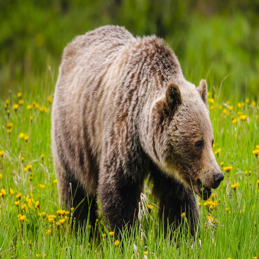

carnivores - leopard


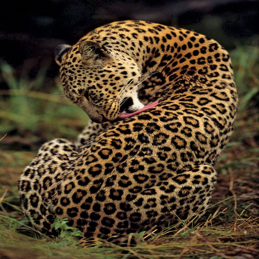

carnivores - lion


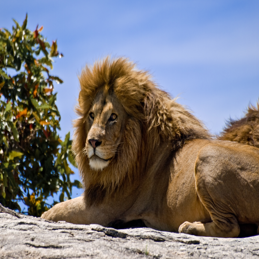

carnivores - tiger


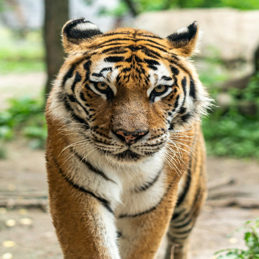

carnivores - wolf


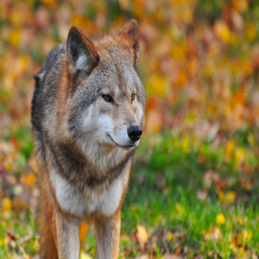

In [ ]:
# testing carnivores
if __name__ == "__main__":
    process_image('bear', 'carnivore', max_images=1, test=True)
    process_image('leopard', 'carnivore', max_images=1, test=True)
    process_image('lion', 'carnivore', max_images=1, test=True)
    process_image('tiger', 'carnivore', max_images=1, test=True)
    process_image('wolf', 'carnivore', max_images=1, test=True)

marsupials - kangaroo


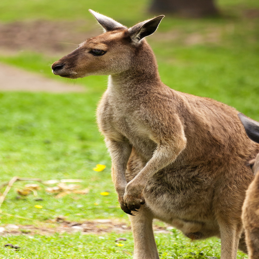

marsupials - koala


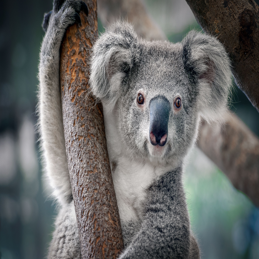

marsupials - opossum


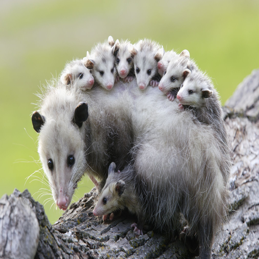

Error fetching image: HTTPConnectionPool(host='www.wild-facts.com', port=80): Max retries exceeded with url: /wp-content/uploads/2010/02/Young_red_necked_wallaby.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x00000151B01D43D0>: Failed to resolve 'www.wild-facts.com' ([Errno 11002] getaddrinfo failed)"))
marsupials - wombat


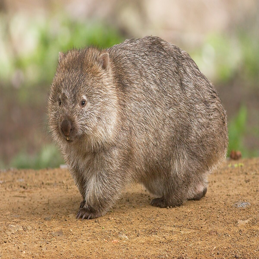

In [ ]:
# testing marsupials
if __name__ == "__main__":
    process_image('kangaroo', 'marsupial', max_images=1, test=True)
    process_image('koala', 'marsupial', max_images=1, test=True)
    process_image('opossum', 'marsupial', max_images=1, test=True)
    process_image('wallaby', 'marsupial', max_images=1, test=True)
    process_image('wombat', 'marsupial', max_images=1, test=True)


primates - baboon


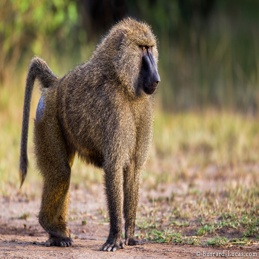

primates - capuchin monkey


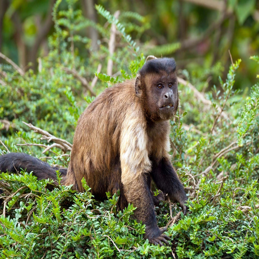

primates - chimpanzee


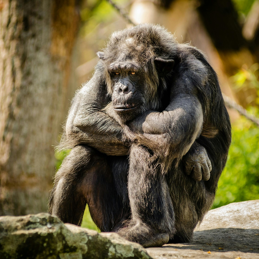

primates - gorilla


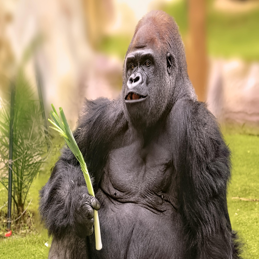

primates - orangutan


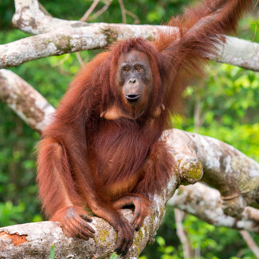

In [ ]:
# testing primates
if __name__ == "__main__":
    process_image('baboon', 'primate', max_images=1, test=True)
    process_image('capuchin monkey', 'primate', max_images=1, test=True)
    process_image('chimpanzee', 'primate', max_images=1, test=True)
    process_image('gorilla', 'primate', max_images=1, test=True)
    process_image('orangutan', 'primate', max_images=1, test=True)

rodents - beaver


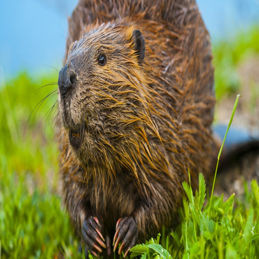

rodents - mouse


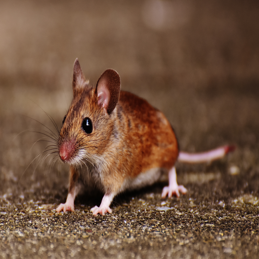

rodents - rabbit


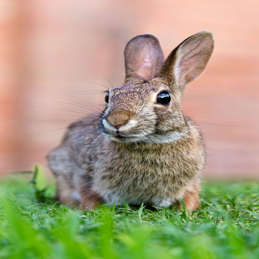

rodents - rat


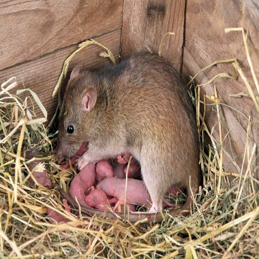

rodents - squirrel


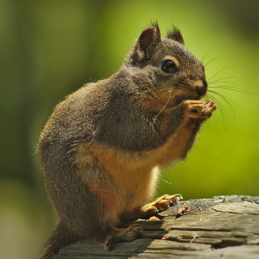

In [ ]:
# testing rodents
if __name__ == "__main__":
    process_image('beaver', 'rodent', max_images=1, test=True)
    process_image('mouse', 'rodent', max_images=1, test=True)
    process_image('rabbit', 'rodent', max_images=1, test=True)
    process_image('rat', 'rodent', max_images=1, test=True)
    process_image('squirrel', 'rodent', max_images=1, test=True)

ungulates - deer


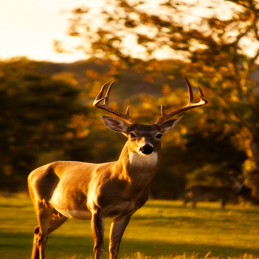

ungulates - elk


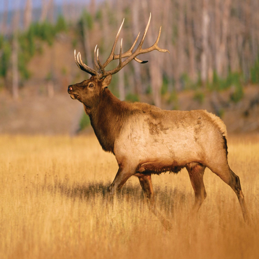

ungulates - giraffe


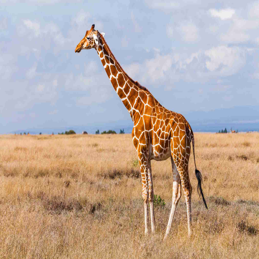

ungulates - moose


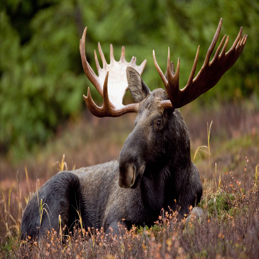

ungulates - zebra


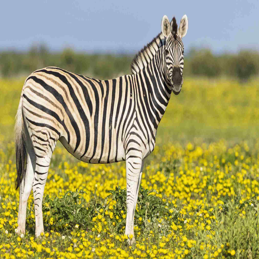

In [ ]:
# testing ungulates
if __name__ == "__main__":
    process_image('deer', 'ungulate', max_images=1, test=True)
    process_image('elk', 'ungulate', max_images=1, test=True)
    process_image('giraffe', 'ungulate', max_images=1, test=True)
    process_image('moose', 'ungulate', max_images=1, test=True)
    process_image('zebra', 'ungulate', max_images=1, test=True)

Lets start building our dataset

In [7]:
# data 
mammal_type_data = {
    'carnivore': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'marsupial': ['kangaroo', 'koala', 'opossum', 'wallaby', 'wombat'],
    'primate': ['baboon', 'capuchin monkey', 'chimpanzee', 'gorilla', 'orangutan'],
    'rodent': ['beaver', 'mouse', 'porcupine', 'rat', 'squirrel'],
    'ungulate': ['deer', 'elk', 'giraffe', 'moose', 'zebra']
}

# function to collect images
def collect_images(dict_data):
    """collect 50 images per animal for all mammals in the dictionary."""
    for key, value in dict_data.items():
        for i in value:
            process_image(i, key, max_images=50, test=False)

In [17]:
# collect images
collect_images(mammal_type_data_3)

Searching for carnivores tiger image 1 of 50.
Skipping invalid image: 404 Client Error: Not Found for url: http://elelur.com/data_images/mammals/tiger/tiger-03.jpg
Searching for carnivores tiger image 3 of 50.
Searching for carnivores tiger image 4 of 50.
Skipping invalid image: HTTPSConnectionPool(host='cdn.chesterzoo.org', port=443): Max retries exceeded with url: /2019/04/2017-Sumatran-tiger-Kirana-in-the-zoo-square.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000151B21DC100>: Failed to resolve 'cdn.chesterzoo.org' ([Errno 11001] getaddrinfo failed)"))
Searching for carnivores tiger image 6 of 50.
Searching for carnivores tiger image 7 of 50.
Searching for carnivores tiger image 8 of 50.
Searching for carnivores tiger image 9 of 50.
Searching for carnivores tiger image 10 of 50.
Searching for carnivores tiger image 11 of 50.
Searching for carnivores tiger image 12 of 50.
Searching for carnivores tiger image 13 of 50.
Searching for carnivores 

In [ ]:
# function to count images per subcategory to test the distribution of images collected
def count_images_per_subcategory(data_dir, class_mapping):
    """count the number of images per subcategory in a dataset."""

    data_dir = Path(data_dir)
    counts = []

    # itterate through each class and its subcategories
    for class_name, subcategories in class_mapping.items():
        class_path = data_dir / class_name
        
        if class_path.is_dir():
            for subcategory in subcategories:
                # find all images that match the subcategory naming pattern
                subcat_images = list(class_path.glob(f"{subcategory}_*.jpg"))
                counts.append([class_name, subcategory, len(subcat_images)])

    # create a DataFrame
    df = pd.DataFrame(counts, columns=["mammal", "animal", "count"])
    return df


In [8]:
# get the counts
df_counts = count_images_per_subcategory("images/training", mammal_type_data)

# view result
print(df_counts)

       mammal           animal  count
0   carnivore             bear     49
1   carnivore          leopard     48
2   carnivore             lion     50
3   carnivore            tiger     46
4   carnivore             wolf     45
5   marsupial         kangaroo     48
6   marsupial            koala     47
7   marsupial          opossum     48
8   marsupial          wallaby     47
9   marsupial           wombat     47
10    primate           baboon     47
11    primate  capuchin monkey     48
12    primate       chimpanzee     48
13    primate          gorilla     49
14    primate        orangutan     46
15     rodent           beaver     45
16     rodent            mouse     48
17     rodent        porcupine     46
18     rodent              rat     50
19     rodent         squirrel     48
20   ungulate             deer     48
21   ungulate              elk     50
22   ungulate          giraffe     49
23   ungulate            moose     47
24   ungulate            zebra     50


## Step 2: Train the Model

In [17]:
# data splitting
import os
import random
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split

# move files into train/val folders and load data using pytorch
import shutil
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 
import glob
from pathlib import Path
from PIL import Image


In [ ]:
# dictionary to hold train/val splits
train_files = []
val_files = []

# collect images by class and subcategory
subcategory_images = defaultdict(list)

# iterate over class folders (carnivore, marsupial, etc.)
for class_name in os.listdir("images/training/"):
    class_path = os.path.join("images/training/", class_name)
    
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            if image_file.endswith(".jpg"):
                subcategory = image_file.rsplit("_", 1)[0]  # extract subcategory (e.g., 'bear' from 'bear_0.jpg')
                subcategory_images[(class_name, subcategory)].append(os.path.join(class_path, image_file))

# perform a 80/20 split per subcategory
split_data = []
for (class_name, subcategory), images in subcategory_images.items():
    random.shuffle(images)  # shuffle for randomness
    train, val = train_test_split(images, test_size=0.2, random_state=42)
    
    for file in train:
        split_data.append(("train", class_name, subcategory, file))
    for file in val:
        split_data.append(("val", class_name, subcategory, file))

# convert to dataframe for verification
split_df = pd.DataFrame(split_data, columns=["set", "class", "subcategory", "file"])

# summarize the counts
summary_table = split_df.groupby(["set", "class", "subcategory"]).size().reset_index(name="count")

# display summary of train/val counts per class & subcategory
print(summary_table)


      set      class      subcategory  count
0   train  carnivore             bear     39
1   train  carnivore          leopard     38
2   train  carnivore             lion     40
3   train  carnivore            tiger     36
4   train  carnivore             wolf     36
5   train  marsupial         kangaroo     38
6   train  marsupial            koala     37
7   train  marsupial          opossum     38
8   train  marsupial          wallaby     37
9   train  marsupial           wombat     37
10  train    primate           baboon     37
11  train    primate  capuchin monkey     38
12  train    primate       chimpanzee     38
13  train    primate          gorilla     39
14  train    primate        orangutan     36
15  train     rodent           beaver     36
16  train     rodent            mouse     38
17  train     rodent        porcupine     36
18  train     rodent              rat     40
19  train     rodent         squirrel     38
20  train   ungulate             deer     38
21  train 

In [20]:
# move images from images/training to train and val folders under dataset
train_path = os.path.join("dataset", "train")
val_path = os.path.join("dataset", "val")

# create train/val directories
for path in [train_path, val_path]:
    os.makedirs(path, exist_ok=True)

# move images into correct train/val directories
for _, row in split_df.iterrows():
    dataset_type, class_name, subcategory, file_path = row["set"], row["class"], row["subcategory"], row["file"]
    
    # destination path
    dest_folder = os.path.join("dataset", dataset_type, class_name)
    os.makedirs(dest_folder, exist_ok=True)
    
    # move file
    shutil.move(file_path, os.path.join(dest_folder, os.path.basename(file_path)))

print("Files successfully moved into structured dataset format.")


FileNotFoundError: [Errno 2] No such file or directory: 'images/training/carnivore\\bear_13.jpg'

In [32]:
# define transforms (only resizing + normalization for now)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize to 224x224 (adjustable)
    transforms.ToTensor()           # convert to pytorch tensor
])

# load datasets
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
val_dataset = datasets.ImageFolder(root=val_path, transform=transform)

# create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# verify class mappings
print("class index mapping:")
print(train_dataset.class_to_idx)
print('')
print('data summary:')
print(f"total | {len(train_dataset) + len(val_dataset)}")
print(f"train | {len(train_dataset)}")
print(f"val   | {len(val_dataset)}")

class index mapping:
{'carnivore': 0, 'marsupial': 1, 'primate': 2, 'rodent': 3, 'ungulate': 4}

data summary:
total | 1194
train | 946
val   | 248


In [ ]:
# 6
import matplotlib.pyplot as plt

# Get a batch of images
images, labels = next(iter(train_loader))

# Display 12 images in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    if i >= len(images):
        break
    img = images[i].permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    ax.imshow(img)
    ax.set_title(class_names[labels[i].item()])
    ax.axis("off")

plt.show()


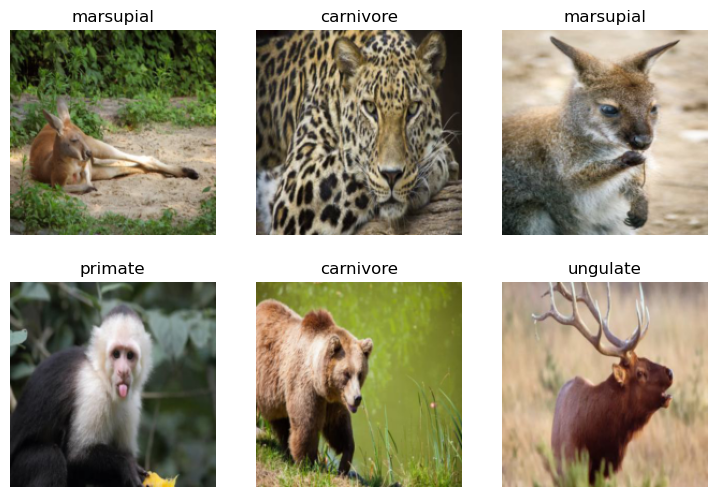

In [14]:
# create training and validation dataset
# note - change mammal type names to singular
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

data.show_batch(max_n=6)

In [15]:
# train model using a pretrained model - resnet
trained_model = vision_learner(data, resnet18, metrics=error_rate)
trained_model.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Step 3: Test the Model

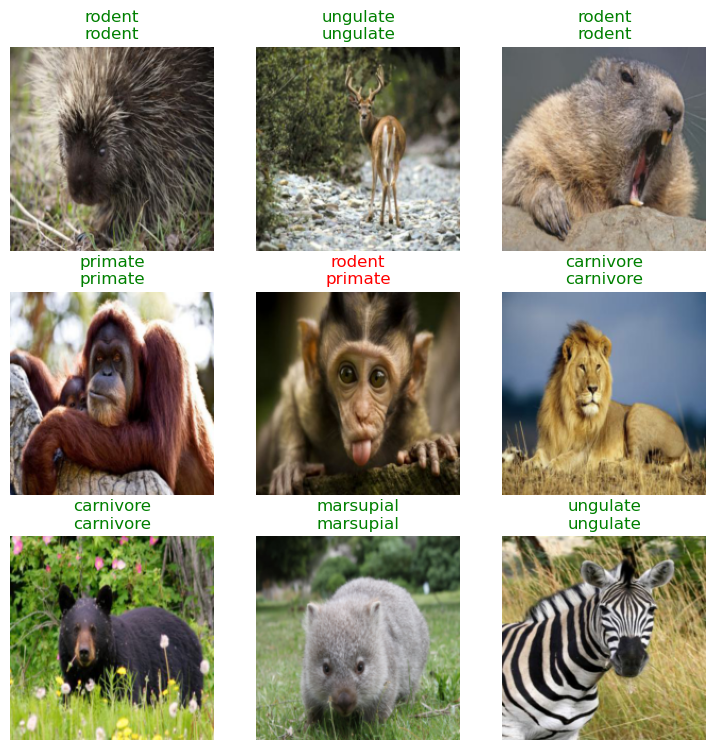

In [16]:
# show some results on validation set (actual label and prediction)
trained_model.show_results()

chimpanzee photo


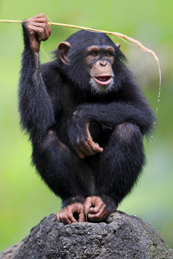

This is a: primate mammal type

bear photo


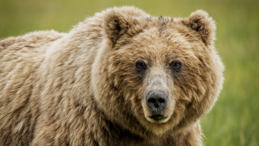

This is a: carnivore mammal type

zebra photo


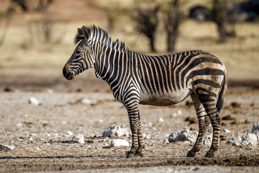

This is a: ungulate mammal type

kangaroo photo


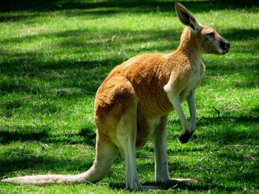

This is a: marsupial mammal type

mouse photo


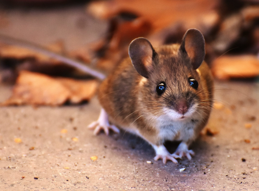

This is a: rodent mammal type

tiger photo


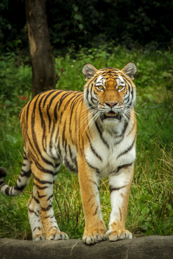

This is a: carnivore mammal type

baboon photo


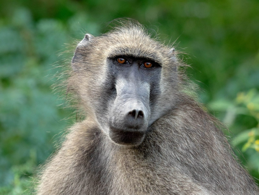

This is a: primate mammal type

moose photo


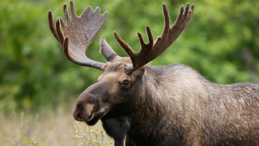

This is a: ungulate mammal type

beaver photo


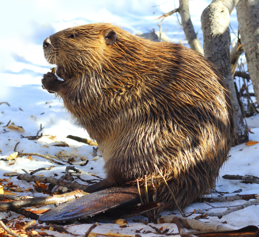

This is a: rodent mammal type



In [32]:
# make predictions on random animals
mammals = 'chimpanzee', 'bear', 'zebra', 'kangaroo', 'mouse', 'tiger', 'baboon', 'moose', 'beaver'
for i in mammals:
    download_url(search_images(f'{i} photo', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)
    mammal_type,_,probs = trained_model.predict(img)
    print(f"This is a: {mammal_type} mammal type\n")
    

In [ ]:
import pickle

# save the trained model
with open("mammal_classifier.pkl", "wb") as f:
    pickle.dump(trained_model, f)

print("Model saved as mammal_classifier.pkl")


In [ ]:
# create a pickle file
from IPython.display import FileLink

trained_model.export('model.pkl')
FileLink('model.pkl')